In [1]:
from aqua.graphics import plot_hovmoller
from aqua.diagnostics.teleconnections import mjo_hovmoller
from aqua import Reader

MJO is a teleconnection that require daily aggregated data.
We specify the teleconnection name and the model/exp/source to analyze.

In [2]:
telecname = 'MJO'

model = 'ERA5'
exp = 'era5'
source = 'daily'

The Reader class is user to retrieve the data, with standard resolution `r025` and the `daily` frequency.

In [3]:
reader = Reader(model=model,exp=exp,source=source, regrid='r025')
data = reader.retrieve()

2024-12-13 16:18:04 :: Reader :: WARNING  -> Variable time_bnds has no units!


In order to plot the data we subselect a time slice of data, then we use the `Reader` methods to obtain the correctly formatted data for the plot

In [4]:
sel = {'time': slice('2021-01-01','2021-06-30')}

data_sel = data.sel(**sel)
data_sel = reader.timmean(data_sel, freq='daily')
data_sel = reader.regrid(data_sel)

Finally the data are smoothed with a 5 days rolling window, selecting the correct variable and ready to be plotted.

In [5]:
data_sel

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 181, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1kB 2021-01-01 2021-01-02 ... 2021-06-30
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    tnlwrf   (time, lat, lon) float64 2GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    history:  \n2024-12-13 16:18:05 AQUA💧: Regrid from era5-r025s to r025;\n

In [6]:
data_smooth = mjo_hovmoller(data_sel, telecname=telecname, loglevel='DEBUG')

2024-12-13 16:18:05 :: MJO :: INFO     -> No namelist provided. Trying to load default namelist.
2024-12-13 16:18:05 :: MJO :: INFO     -> Subselecting var tnlwrf
2024-12-13 16:18:05 :: MJO :: INFO     -> Flipping the sign of the variable.


To plot we use the `plot_hovmoller` function from the framework

In [7]:
data_smooth

<xarray.DataArray 'tnlwrf' (time: 181, lat: 120, lon: 1440)> Size: 250MB
dask.array<sub, shape=(181, 120, 1440), dtype=float64, chunksize=(1, 120, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1kB 2021-01-01 2021-01-02 ... 2021-06-30
  * lat      (lat) float64 960B -14.88 -14.62 -14.38 ... 14.38 14.62 14.88
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/14)
    standard_name:  toa_outgoing_longwave_flux
    long_name:      Top net long-wave radiation flux
    units:          W m**-2
    code:           179
    table:          128
    cell_methods:   time: mean
    ...             ...
    shortName:      tnlwrf
    derived:        TTR*24
    factor:         1.1574074074074073e-05
    src_units:      J m**-2 day**-1
    units_fixed:    1
    regridded:      1

2024-12-13 16:18:31 :: Hovmoller :: INFO     -> Averaging over dimension: lat
2024-12-13 16:18:31 :: Hovmoller :: DEBUG    -> Inverting axis for plot
2024-12-13 16:18:31 :: Hovmoller :: DEBUG    -> Setting vmin to -90, vmax to 90


/LUMI_TYKKY_EBTfEqs/miniconda/envs/env1/lib/python3.12/site-packages/sparse/_coo/core.py:216: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(


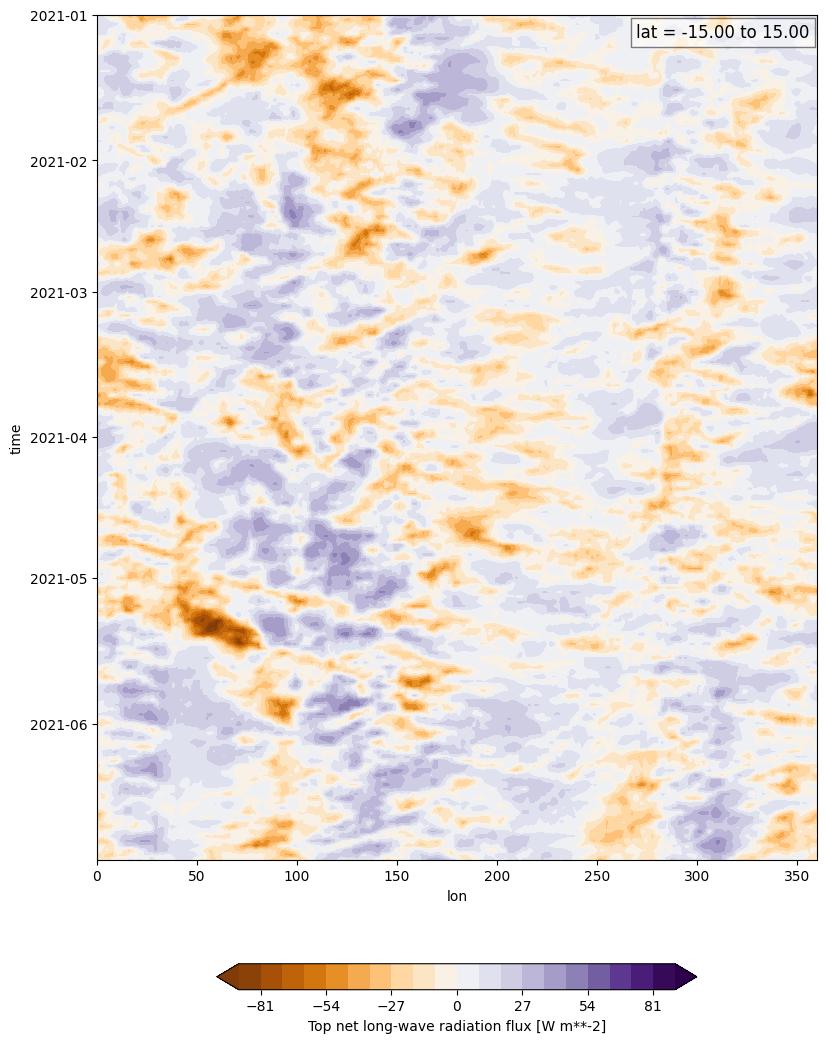

In [8]:
plot_hovmoller(data_smooth, dim='lat', invert_axis=True, invert_time=True, nlevels=21, loglevel='DEBUG', cmap='PuOr', vmin=-90, vmax=90)